# Data Challenge 8: Video Game Sales

## Susan Currie Sivek

Our client seeks insights into market research for the video game industry. We have video game sales data for 30 years, and drawing on these data, we want to explore:

1. What are some major differences between the North American, European, and Japanese video game markets?
2. What video game genres are trending in each market?
3. What features about a video game are most indicative of its success?


### Key Takeaways:
- North American and European video game markets are largely similar in genre and platform preferences; the Japanese market differs somewhat in genre tastes and in platform adoption/usage.
- Shooter, Sports, and Fighting games have increased their proportion of sales in North America and Europe in the last 10 years of these data. In Japan, again, genre preferences vary, with Action and Role-Playing games increasing their contribution to total Japanese sales in recent years.

In [27]:
# import necessary tools

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import pandas_profiling 

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,16598
Total Missing (%),0.2%
Total size in memory,1.4 MiB
Average record size in memory,88.0 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,1


### Notes on reviewing the data profile:
- One issue appears to be that some games have sales of 0 in some markets, presumably meaning they were not sold there. I will need to be sure to analyze only those actually sold in a market (sales > 0) to determine what features correlated with success.
- The main features of the games to be analyzed are their platform, genre, and publisher.

## Question 1: What are some major differences between the North American, European, and Japanese video game markets?

In [36]:
# create new features indicating sale of games in each market

df['Sold_NA'] = np.where(df['NA_Sales']> 0, 1, 0)
df['Sold_EU'] = np.where(df['EU_Sales']> 0, 1, 0)
df['Sold_JP'] = np.where(df['JP_Sales']> 0, 1, 0)

In [42]:
# make new DFs representing each market for easier comparison

NA_Games = df[df['Sold_NA'] == 1]
EU_Games = df[df['Sold_EU'] == 1]
JP_Games = df[df['Sold_JP'] == 1]

In [46]:
print(len(NA_Games)) # 12099 games
print(len(EU_Games)) # 10868 games
print(len(JP_Games)) # 6143 games

12099
10868
6143


Text(0, 0.5, 'Mean Sales in Millions')

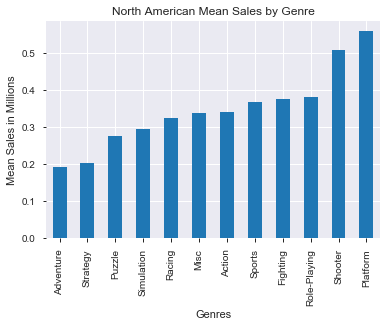

In [56]:
NA_Games.groupby('Genre')['NA_Sales'].mean().sort_values(ascending=True).plot(kind='bar') 
plt.title('North American Mean Sales by Genre')
plt.xlabel('Genres')
plt.ylabel('Mean Sales in Millions')

Text(0, 0.5, 'Mean Sales in Millions')

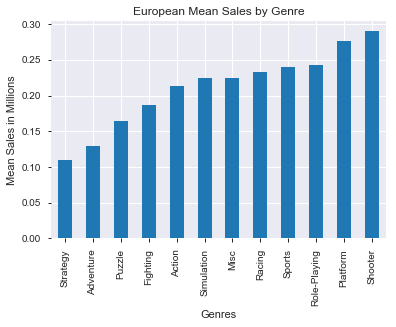

In [57]:
EU_Games.groupby('Genre')['EU_Sales'].mean().sort_values(ascending=True).plot(kind='bar') 
plt.title('European Mean Sales by Genre')
plt.xlabel('Genres')
plt.ylabel('Mean Sales in Millions')

Text(0, 0.5, 'Mean Sales in Millions')

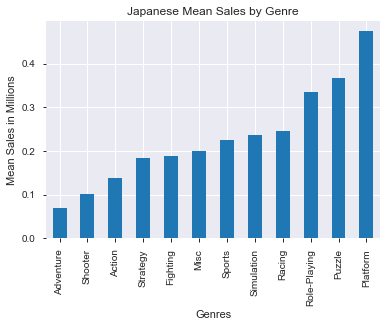

In [58]:
JP_Games.groupby('Genre')['JP_Sales'].mean().sort_values(ascending=True).plot(kind='bar') 
plt.title('Japanese Mean Sales by Genre')
plt.xlabel('Genres')
plt.ylabel('Mean Sales in Millions')

A quick examination of these histograms by genre and mean sales per genre shows that the top three genres in these three markets differ somewhat. The top 3 in the North American market are Platform, Shooter, and Role-Playing (in that order); in Europe, Shooter, Platform, and Role-Playing; and in Japan, Platform, Puzzle, and Role-Playing. On average, puzzle games apparently generate more sales in Japan than in the other two markets.

Text(0, 0.5, 'Mean Sales in Millions')

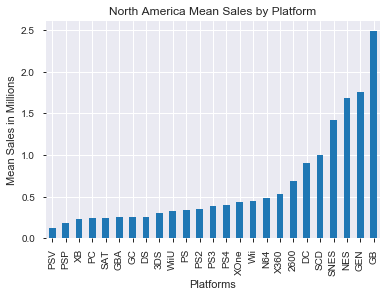

In [60]:
NA_Games.groupby('Platform')['NA_Sales'].mean().sort_values(ascending=True).plot(kind='bar') 
plt.title('North America Mean Sales by Platform')
plt.xlabel('Platforms')
plt.ylabel('Mean Sales in Millions')

Text(0, 0.5, 'Mean Sales in Millions')

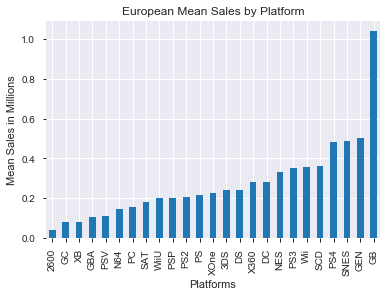

In [61]:
EU_Games.groupby('Platform')['EU_Sales'].mean().sort_values(ascending=True).plot(kind='bar') 
plt.title('European Mean Sales by Platform')
plt.xlabel('Platforms')
plt.ylabel('Mean Sales in Millions')

Text(0, 0.5, 'Mean Sales in Millions')

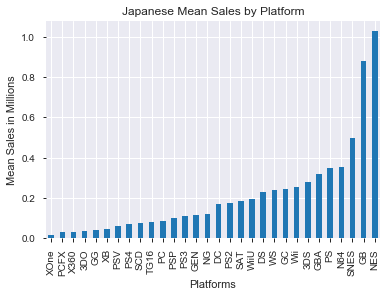

In [59]:
JP_Games.groupby('Platform')['JP_Sales'].mean().sort_values(ascending=True).plot(kind='bar') 
plt.title('Japanese Mean Sales by Platform')
plt.xlabel('Platforms')
plt.ylabel('Mean Sales in Millions')

A quick examination of these histograms by platform and mean sales per platform shows that the top three platforms in these three markets differ somewhat. The top 3 in the North American market are Game Boy, GEN, and NES (in that order); in Europe, Game Boy, GEN, and Super NES; and in Japan, NES, Game Boy, and Super NES. This analysis likely shows the massive popularity in North American and Europe of the Game Boy device upon its pioneering release, and the slower adoption in Europe of video games, given that the Super NES reflected higher game sales than the original NES. The Japanese market shows a slightly lower popularity of the Game Boy and very high popularity for three Nintendo systems (NES, SNES, and in 4th place, the Nintendo64).

In [73]:
NA = pd.DataFrame(NA_Games.groupby('Year')['NA_Sales'].mean().sort_values(ascending=False))
EU = pd.DataFrame(EU_Games.groupby('Year')['EU_Sales'].mean().sort_values(ascending=False))
JP = pd.DataFrame(JP_Games.groupby('Year')['JP_Sales'].mean().sort_values(ascending=False))

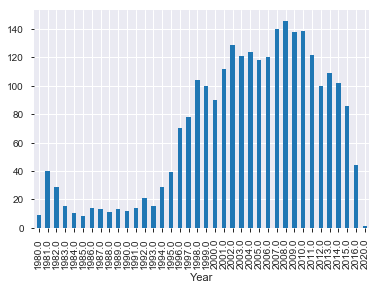

In [79]:
# Plot mean sales per game by year
NA_Games.groupby('Year')['NA_Sales'].nunique().plot(kind='bar')
plt.show()

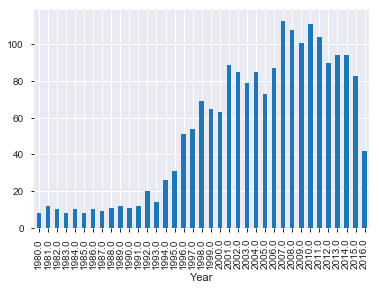

In [80]:
EU_Games.groupby('Year')['EU_Sales'].nunique().plot(kind='bar')
plt.show()

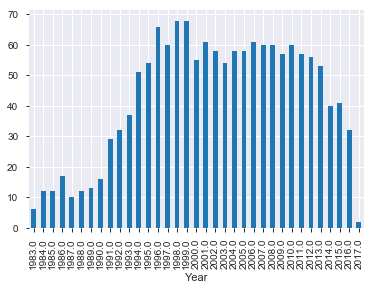

In [81]:
JP_Games.groupby('Year')['JP_Sales'].nunique().plot(kind='bar')
plt.show()

These histograms reflect changes in the mean sales of games over time. North America and Europe show similar patterns of growing sales and decline, with mean game sales declining more rapidly in the North American market than in Europe. The Japanese market shows a faster adoption of video games, with mean sales increasing quickly over the mid-1990s; additionally, mean sales per game plateaued more quickly in the 2000s and have declined more quickly post 2012 or so than in the other two markets.

### Question 2: Which game genres are trending in each market?

To identify "trending" genres, I will look at the last 10 years of data in each market. I will determine what proportion of total game sales each year was comprised of games in each genre, and then see whether there are noticeable shifts in popularity among the genres.

In [103]:
NA_Trend = NA_Games[NA_Games['Year'] >= 2006]
EU_Trend = EU_Games[EU_Games['Year'] >= 2006]
JP_Trend = JP_Games[JP_Games['Year'] >= 2006]

In [171]:
NA_Trend.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sold_NA,Sold_EU,Sold_JP
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1,1,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1,1,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1,1,1
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,1,1,1
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1,1,1


In [224]:
NA_Trend = NA_Trend[NA_Trend.Year != 2020] # remove errant post-2016 data

In [244]:
JP_Trend = JP_Trend[JP_Trend.Year <= 2016] # remove errant post-2016 data

In [226]:
NA_proportions = (NA_Trend.groupby(['Year', 'Genre'])['NA_Sales'].sum(axis = 1, skipna = True) / \
    (NA_Trend.groupby(['Year'])['NA_Sales'].sum(axis = 1, skipna = True))) \
    .to_frame(name = 'prop').reset_index()

In [227]:
NA_proportions.head()

,Year,Genre,prop
0,2006.0,Action,0.145827
1,2006.0,Adventure,0.019611
2,2006.0,Fighting,0.047431
3,2006.0,Misc,0.099004
4,2006.0,Platform,0.088629


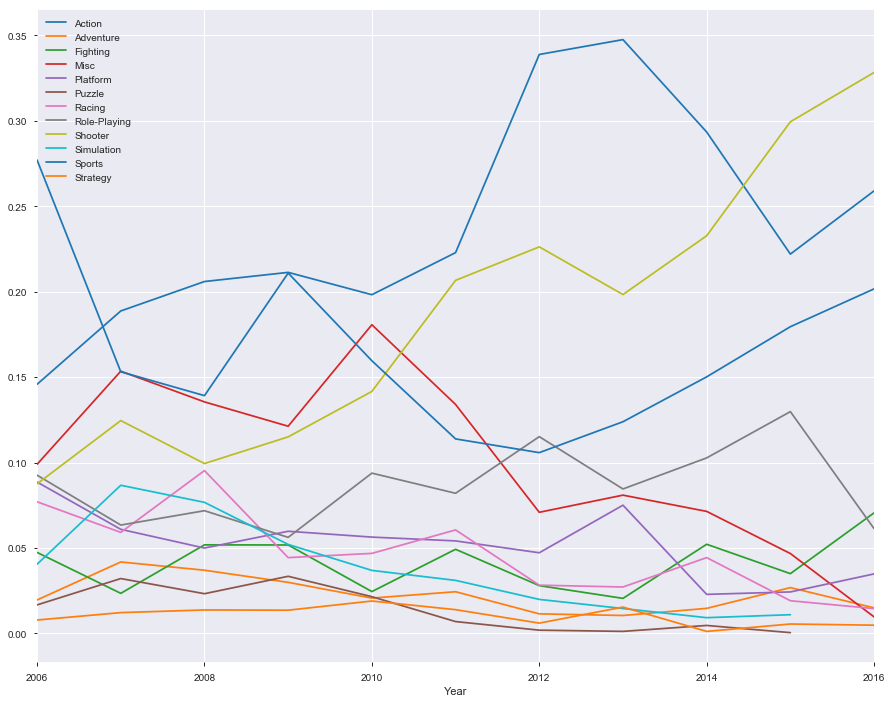

In [238]:
# plot data
fig, ax = plt.subplots(figsize=(15,12))

NA_proportions.groupby('Genre').plot(x='Year', y='prop', ax=ax)
ax.legend(NA_proportions['Genre']);

#### North American Genre Trends 

In the North American market, it appears that the proportion of sales from Shooter, Sports, and Fighting games has increased in the last few years. Action and Platform games have seen recent upticks, but these each could perhaps be accounted for by a single popular title per genre (which should be examined more closely).

In [230]:
# analysis of European market
EU_proportions = (EU_Trend.groupby(['Year', 'Genre'])['EU_Sales'].sum(axis = 1, skipna = True) / \
    (EU_Trend.groupby(['Year'])['EU_Sales'].sum(axis = 1, skipna = True))) \
    .to_frame(name = 'prop').reset_index()

In [231]:
EU_proportions.head()

,Year,Genre,prop
0,2006.0,Action,0.118307
1,2006.0,Adventure,0.020427
2,2006.0,Fighting,0.034974
3,2006.0,Misc,0.149721
4,2006.0,Platform,0.092618


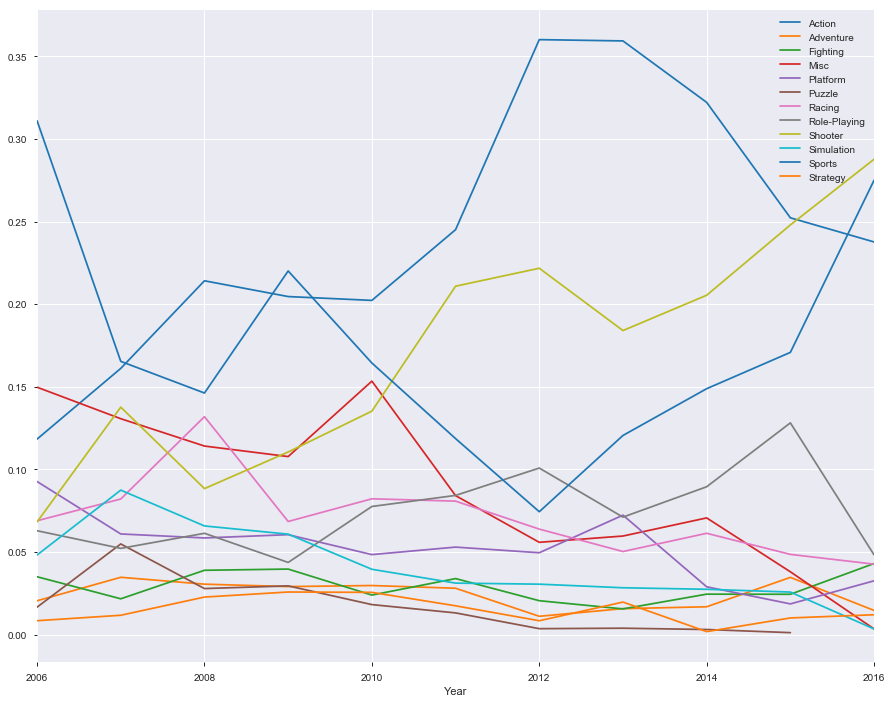

In [237]:
# plot data
fig, ax = plt.subplots(figsize=(15,12))

EU_proportions.groupby('Genre').plot(x='Year', y='prop', ax=ax)
ax.legend(EU_proportions['Genre']);

#### European Genre Trends 

In the European market, it appears that the proportion of sales from Shooter, Sports, and Fighting games has increased in the last few years. Strategy games, while accounting for a small proportion of total sales, have also increased slightly in the most recent couple of years.

In [245]:
# analysis of Japanese market
JP_proportions = (JP_Trend.groupby(['Year', 'Genre'])['JP_Sales'].sum(axis = 1, skipna = True) / \
    (JP_Trend.groupby(['Year'])['JP_Sales'].sum(axis = 1, skipna = True))) \
    .to_frame(name = 'prop').reset_index()

In [246]:
JP_proportions.tail()

,Year,Genre,prop
126,2016.0,Role-Playing,0.264964
127,2016.0,Shooter,0.044526
128,2016.0,Simulation,0.021898
129,2016.0,Sports,0.056934
130,2016.0,Strategy,0.003650


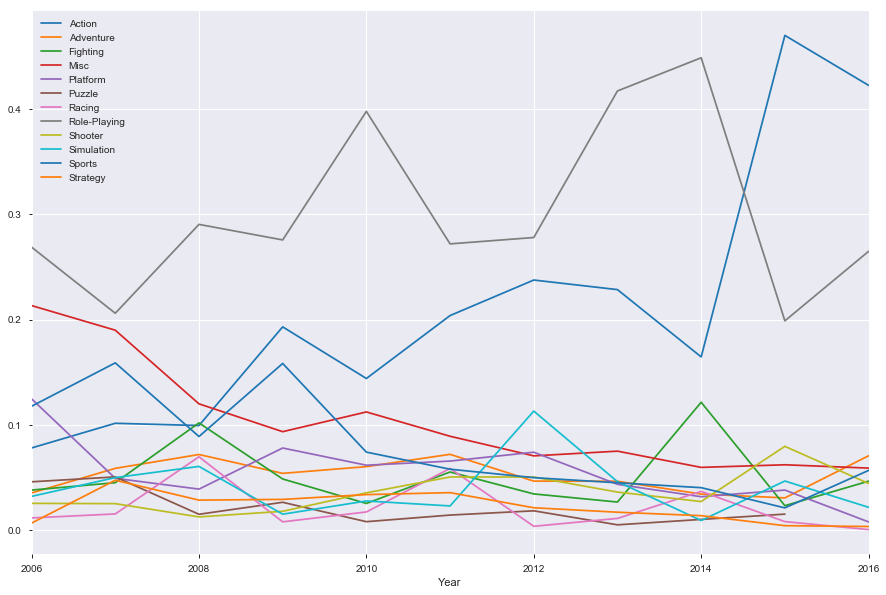

In [247]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))

JP_proportions.groupby('Genre').plot(x='Year', y='prop', ax=ax)
ax.legend(JP_proportions['Genre']);

#### Japanese Genre Trends 

In the Japanese market, Action and Role-Playing games have accounted for a large and growing portion of the total sales for some time, with some recent fluctuations, perhaps due to the release of particularly popular games in these genres. Shooter and Adventure games also appear to be emerging genres in terms of their proportion of total sales. Fighting games have an erratic sales history, which may reflect new versions of a franchise being released.

### Question 3: What features about a video game are most indicative of its success?

To identify these indicative features, I will look at the games' platform, genre, and publisher, and assess the relationship of these features to their overall global sales (since no specific market was identified for this question). 

In [309]:
df3 = pd.read_csv("vgsales.csv")

In [314]:
top_50 = df3.head(50)

In [315]:
top_50.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [318]:
# use ordinary least squares from statsmodels for multiple linear regression
# can handle categorical data like the features in these data

from statsmodels.formula.api import ols

# model predicting global sales using platform, genre, and publisher
model = ols('Global_Sales ~ C(Platform) + C(Genre) + C(Publisher)', data=top_50)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.9724
Date:                Sat, 24 Aug 2019   Prob (F-statistic):              0.524
Time:                        15:49:15   Log-Likelihood:                -177.37
No. Observations:                  50   AIC:                             402.7
Df Residuals:                      26   BIC:                             448.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       7.2309     13.510      0.535      0.597     -20.539      35.001
C(Platform)[T.DS]                               8.0050      8.834      0.906      0.373     -10.154      26.164
C(Platform)[T.GB]                              12.6760      9.101      1.393      0.175      -6.032      31.384
C(Platform)[T.GBA]                              5.2169     13.769      0.379      0.708     -23.087      33.520
C(Platform)[T.N64]                              2.0990     15.499      0.135      0.893     -29.759      33.957
C(Platform)[T.NES]                             19.6178     12.516      1.567      0.129      -6.109      45.345
C(Platform)[T.PS2]                              2.7167      9.357      0.290      0.774     -16.518      21.951
C(Platform)[T.PS3]                              3.8646      7.087      0.545      0.590     -10.702      18.432
C(Platform)[T.PS4]                              0.7598      8.631      0.088      0.931     -16.982      18.502
C(Platform)[T.SNES]                            10.8190     15.499      0.698      0.491     -21.039      42.677
C(Platform)[T.Wii]                             13.5737     10.562      1.285      0.210      -8.136      35.284
C(Platform)[T.X360]                             3.2256      6.809      0.474      0.640     -10.770      17.221
C(Genre)[T.Fighting]                           -4.4287     18.460     -0.240      0.812     -42.373      33.515
C(Genre)[T.Misc]                               10.5844     14.611      0.724      0.475     -19.449      40.618
C(Genre)[T.Platform]                            5.8960     13.857      0.425      0.674     -22.588      34.380
C(Genre)[T.Puzzle]                              8.5445     14.749      0.579      0.567     -21.773      38.862
C(Genre)[T.Racing]                             12.7288     14.189      0.897      0.378     -16.437      41.895
C(Genre)[T.Role-Playing]                        6.7381     13.341      0.505      0.618     -20.684      34.160
C(Genre)[T.Shooter]                             3.4996     17.218      0.203      0.841     -31.893      38.892
C(Genre)[T.Simulation]                          6.6150     14.269      0.464      0.647     -22.716      35.946
C(Genre)[T.Sports]                             22.6463     15.458      1.465      0.155      -9.128      54.421
C(Publisher)[T.Microsoft Game Studios]         -0.5185     11.567     -0.045      0.965     -24.294      23.257
C(Publisher)[T.Nintendo]                       -3.3359     11.276     -0.296      0.770     -26.513      19.842
C(Publisher)[T.Sony Computer Entertainment]    -9.3563     19.299     -0.485      0.632     -49.026      30.313
C(Publisher)[T.Take-Two Interactive]            6.7391     

In [322]:
# model predicting global sales using only genre and publisher
simpler_model = ols('Global_Sales ~ C(Genre) + C(Publisher)', data=top_50)

In [323]:
fitted_simpler_model = simpler_model.fit()
fitted_simpler_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1.647
Date:                Sat, 24 Aug 2019   Prob (F-statistic):              0.117
Time:                        15:51:41   Log-Likelihood:                -181.22
No. Observations:                  50   AIC:                             390.4
Df Residuals:                      36   BIC:                             417.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.2975     14.503      0.089      0.929     -28.117      30.712
C(Genre)[T.Fighting]                            1.1400     15.124      0.075      0.940     -29.533      31.813
C(Genre)[T.Misc]                               14.6300     12.782      1.145      0.260     -11.293      40.553
C(Genre)[T.Platform]                           10.3887     11.343      0.916      0.366     -12.616      33.393
C(Genre)[T.Puzzle]                             10.8800     13.098      0.831      0.412     -15.683      37.443
C(Genre)[T.Racing]                             11.9167     12.349      0.965      0.341     -13.127      36.961
C(Genre)[T.Role-Playing]                        6.1400     11.343      0.541      0.592     -16.864      29.144
C(Genre)[T.Shooter]                            12.5900     14.002      0.899      0.375     -15.807      40.987
C(Genre)[T.Simulation]                          6.6150     13.098      0.505      0.617     -19.948      33.178
C(Genre)[T.Sports]                             28.2150     11.956      2.360      0.024       3.966      52.464
C(Publisher)[T.Microsoft Game Studios]          2.0725      9.797      0.212      0.834     -17.797      21.942
C(Publisher)[T.Nintendo]                       10.6025      9.797      1.082      0.286      -9.267      30.472
C(Publisher)[T.Sony Computer Entertainment]     0.1058     13.831      0.008      0.994     -27.944      28.156
C(Publisher)[T.Take-Two Interactive]           15.3392     15.146      1.013      0.318     -15.379      46.057
==============================================================================
Omnibus:                       39.128   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.743
Skew:                           1.924   Prob(JB):                     2.78e-36
Kurtosis:                      10.986   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
# model predicting global sales using only genre and platform

simpler_model_2 = ols('Global_Sales ~ C(Platform) + C(Genre)', data=top_50)
fitted_model = simpler_model_2.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1.164
Date:                Sat, 24 Aug 2019   Prob (F-statistic):              0.347
Time:                        15:52:21   Log-Likelihood:                -178.15
No. Observations:                  50   AIC:                             398.3
Df Residuals:                      29   BIC:                             438.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   12.2732      9.938      1.235      0.227      -8.051      32.598
C(Platform)[T.DS]            6.3635      8.315      0.765      0.450     -10.642      23.369
C(Platform)[T.GB]           11.7170      8.670      1.351      0.187      -6.016      29.450
C(Platform)[T.GBA]           4.3368     13.207      0.328      0.745     -22.675      31.349
C(Platform)[T.N64]           1.2440     14.743      0.084      0.933     -28.908      31.396
C(Platform)[T.NES]          18.5799     11.202      1.659      0.108      -4.330      41.490
C(Platform)[T.PS2]           2.0306      9.943      0.204      0.840     -18.305      22.366
C(Platform)[T.PS3]           5.7380     11.611      0.494      0.625     -18.009      29.485
C(Platform)[T.PS4]           2.5743     12.600      0.204      0.840     -23.196      28.344
C(Platform)[T.SNES]          9.9640     14.743      0.676      0.504     -20.188      40.116
C(Platform)[T.Wii]          13.3470     10.034      1.330      0.194      -7.175      33.869
C(Platform)[T.X360]          5.0398     10.838      0.465      0.645     -17.126      27.206
C(Genre)[T.Fighting]       -12.5802     14.278     -0.881      0.386     -41.781      16.621
C(Genre)[T.Misc]             3.1633      8.833      0.358      0.723     -14.902      21.229
C(Genre)[T.Platform]        -1.6273      8.468     -0.192      0.849     -18.947      15.692
C(Genre)[T.Puzzle]           1.4665     11.004      0.133      0.895     -21.040      23.973
C(Genre)[T.Racing]           2.5904      7.488      0.346      0.732     -12.723      17.904
C(Genre)[T.Role-Playing]    -0.7601      8.850     -0.086      0.932     -18.859      17.339
C(Genre)[T.Shooter]         -3.4750      6.867     -0.506      0.617     -17.520      10.570
C(Genre)[T.Simulation]      -0.1217     10.776     -0.011      0.991     -22.161      21.918
C(Genre)[T.Sports]          14.4948     10.472      1.384      0.177      -6.923      35.913
==============================================================================
Omnibus:                       45.342   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.741
Skew:                           2.123   Prob(JB):                     5.96e-60
Kurtosis:                      13.625   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
# model predicting global sales using only genre

simpler_model_3 = ols('Global_Sales ~ C(Genre)', data=top_50)
fitted_model = simpler_model_3.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.160
Date:                Sat, 24 Aug 2019   Prob (F-statistic):             0.0463
Time:                        15:54:34   Log-Likelihood:                -182.98
No. Observations:                  50   AIC:                             386.0
Df Residuals:                      40   BIC:                             405.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   15.9600      3.972      4.018      0.000       7.932      23.988
C(Genre)[T.Fighting]        -2.9200     11.235     -0.260      0.796     -25.626      19.786
C(Genre)[T.Misc]             7.7267      7.252      1.065      0.293      -6.930      22.384
C(Genre)[T.Platform]         6.3287      5.439      1.164      0.251      -4.664      17.321
C(Genre)[T.Puzzle]           6.8200      8.426      0.809      0.423     -10.210      23.850
C(Genre)[T.Racing]           3.6580      6.154      0.594      0.556      -8.779      16.095
C(Genre)[T.Role-Playing]     2.0800      5.439      0.382      0.704      -8.913      13.073
C(Genre)[T.Shooter]         -0.8050      5.179     -0.155      0.877     -11.272       9.662
C(Genre)[T.Simulation]       2.5550      8.426      0.303      0.763     -14.475      19.585
C(Genre)[T.Sports]          24.1550      6.587      3.667      0.001      10.842      37.468
==============================================================================
Omnibus:                       36.325   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.027
Skew:                           1.869   Prob(JB):                     1.93e-27
Kurtosis:                       9.714   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
# model predicting global sales using only platform

simpler_model_5 = ols('Global_Sales ~ C(Platform)', data=top_50)
fitted_model = simpler_model_5.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.576
Date:                Sat, 24 Aug 2019   Prob (F-statistic):              0.146
Time:                        16:19:23   Log-Likelihood:                -183.49
No. Observations:                  50   AIC:                             391.0
Df Residuals:                      38   BIC:                             413.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.6300      6.289      2.008      0.052      -0.101      25.361
C(Platform)[T.DS]       6.4322      7.261      0.886      0.381      -8.268      21.132
C(Platform)[T.GB]      10.8720      7.955      1.367      0.180      -5.231      26.975
C(Platform)[T.GBA]      3.2200     12.577      0.256      0.799     -22.241      28.681
C(Platform)[T.N64]     -0.7400     12.577     -0.059      0.953     -26.201      24.721
C(Platform)[T.NES]     15.9800      8.893      1.797      0.080      -2.024      33.984
C(Platform)[T.PS2]      2.7100      7.955      0.341      0.735     -13.393      18.813
C(Platform)[T.PS3]      2.7750      8.319      0.334      0.741     -14.066      19.616
C(Platform)[T.PS4]      0.4800      9.943      0.048      0.962     -19.649      20.609
C(Platform)[T.SNES]     7.9800     12.577      0.634      0.530     -17.481      33.441
C(Platform)[T.Wii]     18.3122      7.261      2.522      0.016       3.612      33.012
C(Platform)[T.X360]     2.6529      7.516      0.353      0.726     -12.563      17.869
==============================================================================
Omnibus:                       60.662   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.116
Skew:                           2.946   Prob(JB):                    2.15e-125
Kurtosis:                      18.519   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking solely at the top 50 games to determine which features contribute to their popularity, I find that the provided information does not offer a great deal of insight in its current form.  Among the linear regression models tested, the games' genre alone offers the best predictor of global sales (as assessed by adjusted R-squared, 0.176).

### Next Steps

If there were more time, I would recommend proceeding with other methods of assessing the features that contribute to the games' popularity -- specifically, I would next try a random forest regression model in order to be able to view feature importance. 

Additionally, I would recommend the incorporation of additional features into this dataset, including:
- whether the game was part of a series, which could determine its future fan base
- the ESRB rating of the game (for kids vs. adults-only, for example)
- the price of the game